In [1]:
import os
import sys
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import imgaug.augmenters as iaa

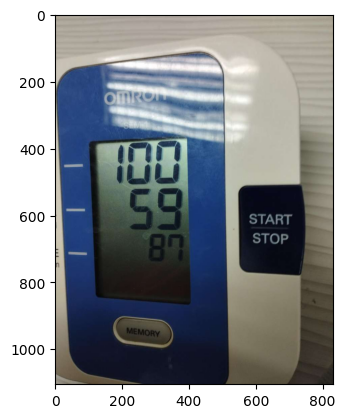

In [148]:
img = cv2.imread('/Users/giakhang/Downloads/inference_data/data_7/7led_a.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [94]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

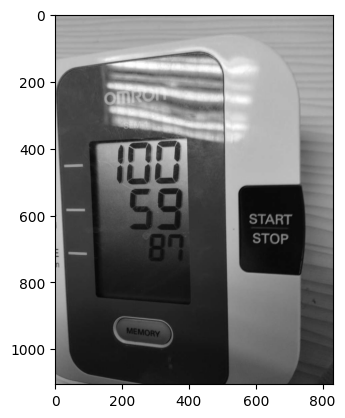

In [95]:
plt.imshow(np.dstack([img, img, img]))

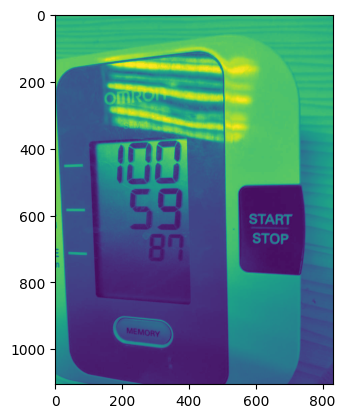

In [10]:
plt.imshow(img)

In [84]:
np.random.seed(10)
x = np.random.randint(0, 255, (100, 100))

In [85]:
x

array([[  9, 125, 228, ..., 205,  88, 143],
       [253, 134, 246, ..., 161,  95, 171],
       [216, 224, 229, ...,   9,  50,   0],
       ...,
       [ 85,  95,  62, ..., 216,  25,  28],
       [ 62, 235,  55, ..., 246, 136,  15],
       [106, 247,  31, ..., 108, 139, 201]])

In [86]:
img = Image.fromarray(np.uint8(x), mode='L')

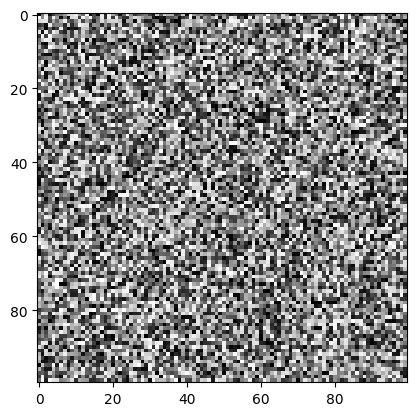

In [91]:
plt.imshow(img, cmap='gray')

In [7]:
def build(args, root=True):
    if args is None or len(args) == 0:
        return None
    elif isinstance(args, list):
        if root:
            sequence = [build(value, root=False) for value in args]
            return iaa.Sequential(sequence)
        else:
            return getattr(iaa, args[0])(
                    *[to_tuple_if_list(a) for a in args[1:]])
    elif isinstance(args, dict):
        cls = getattr(iaa, args['type'])
        return cls(**{
                k: to_tuple_if_list(v)
                for k, v in args['args'].items()
            })
    else:
        raise RuntimeError('unknown augmenter arg: ' + str(args))

def to_tuple_if_list(obj):
    if isinstance(obj, list):
        return tuple(obj)
    return obj

In [8]:
augmenter_args = [{
                'type': 'Fliplr',
                'args': {
                    'p': 0.5
                }
            }, {
                'type': 'Affine',
                'args': {
                    'rotate': [-10, 10]
                }
            }, {
                'type': 'Resize',
                'args': {
                    'size': [0.5, 3]
                }
            }]

In [10]:
x = augmenter_args[0]

In [11]:
x

{'type': 'Fliplr', 'args': {'p': 0.5}}

In [13]:
cls = getattr(iaa, x['type'])

In [14]:
cls

imgaug.augmenters.flip.Fliplr

In [19]:
[i for i in x['args'].items()]

[('p', 0.5)]

In [20]:
x['args'].items()

dict_items([('p', 0.5)])

In [1]:
c = 4, 4

In [2]:
c

(4, 4)

In [139]:
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)
        
    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)  

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios  

    dw /= 2  # divide padding into 2 sides
    dh /= 2  
    
    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    
    return img, ratio, (dw, dh)

In [149]:
img.shape

(1105, 832, 3)

In [150]:
new_img, ratio, d = letterbox(img)

In [151]:
new_img.shape

(640, 512, 3)

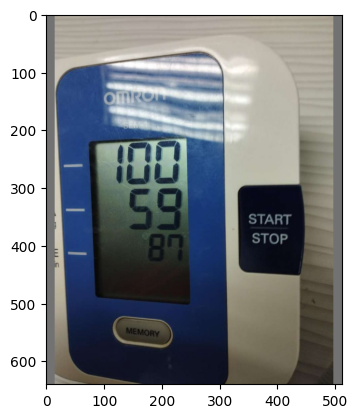

In [85]:
plt.imshow(new_img)

In [86]:
img.shape

(1105, 832, 3)

In [87]:
new_img.shape

(640, 512, 3)

In [88]:
ratio

(0.579185520361991, 0.579185520361991)

In [89]:
d

(15.0, 0.0)

In [90]:
img.shape[0] / img.shape[1]

1.328125

In [91]:
new_img.shape[0] / new_img.shape[1]

1.25

In [93]:
int(round(img.shape[0] * ratio[0]))

640

In [94]:
int(round(img.shape[1] * ratio[1]))

482

In [97]:
ratio

(0.579185520361991, 0.579185520361991)

In [140]:
img = cv2.cvtColor(cv2.imread('/Users/giakhang/Downloads/inference_data/data_9/sino_1.jpeg'), 
                   cv2.COLOR_BGR2RGB)

In [141]:
img.shape

(99, 105, 3)

In [142]:
new_img, ratio, d = letterbox(img)

In [143]:
new_img.shape

(608, 640, 3)

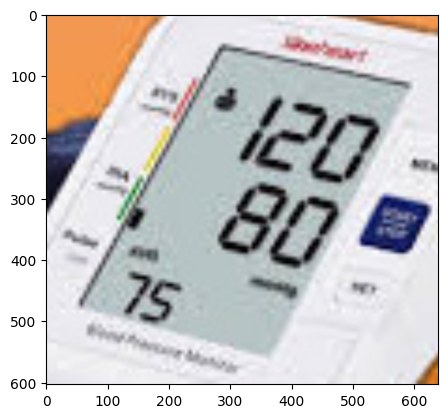

In [115]:
plt.imshow(new_img)

In [70]:
img.shape[0] / img.shape[1]

0.9428571428571428

In [71]:
new_img.shape[0] / new_img.shape[1]

0.95

In [79]:
int(round(img.shape[0] * ratio[0]))

603

In [80]:
int(round(img.shape[1] * ratio[1]))

640

In [77]:
ratio

(6.095238095238095, 6.095238095238095)

In [130]:
640 / 105

6.095238095238095

In [146]:
640 - int(round(99 * 6.095238095238095))

37

In [147]:
37 % 32

5